In [1]:
from time import time
import cv2
from moviepy.editor import VideoFileClip
from matplotlib import pyplot as plt
import track_vehicle_single_frame
from config import *
from src.vehicle_detection.heatmap_funcs import *
from src.vehicle_detection import heatmap_funcs
from src.vehicle_detection import train_classfier
from src.vehicle_detection.VehicleDetectionHeatMap import VehicleDetectionHeatMap
import glob
from src.utility_funcs import plot_orig_and_processed_img
%matplotlib inline

classifier, X_scaler = train_classfier.get_classifier_n_scaler(model_path)

In [2]:
# vehicle traffic configuration.

color_space = 'YCrCb'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hog_channel = 0  # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16)  # Spatial binning dimensions
hist_bins = 16  # Number of histogram bins
spatial_feat = True  # Spatial features on or off
hist_feat = True  # Histogram features on or off
hog_feat = True  # HOG features on or off



# train and test image path
train_vehicle_paths = ['./media/vehicle_img/vehicles/KITTI*/*.png']
train_vehicle_paths = ['./media/vehicle_img/vehicles/**/*.png']

test_vehicle_paths = ['./media/vehicle_img/vehicles/GTI*/*.png']

train_non_vehicle_paths = ['./media/vehicle_img/non-vehicles/Extras/*.png']
train_non_vehicle_paths = ['./media/vehicle_img/non-vehicles/**/*.png']
test_non_vehicle_paths = ['./media/vehicle_img/non-vehicles/GTI/*.png']


nb_recent_heatmap = 5
# For combined frame values, how many are remained.
combined_frame_threshold = 10


# classifier model file.
model_path = 'model.pkl'


input_video = "./media/videos/project_video.mp4"
output_video = './media/videos/project_video_output.mp4'

# vehicle search window configuration
## near windows
near_y_start_stop = [500, None]
near_xy_window_size = (220, 200)
near_xy_overlap = (0.8, 0.8)

## middle distance windows
middle_y_start_stop = (400, 600)
middle_xy_window_size = (125, 100)
middle_xy_overlap = (0.8, 0.8)

## far away distance windows
far_y_start_stop = (400, 550)
far_xy_window_size = (62, 50)
far_xy_overlap = (0.8, 0.8)


In [23]:
def draw_labeled_bboxes(img, labels):
    image = np.zeros_like(img[:,:,0])
    # Iterate through all detected cars
    for car_number in range(1, labels[1] + 1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(image, bbox[0], bbox[1], (255, 0, 255), 6)
    # Return the image
    return image

In [3]:
def mark_vehicles(image, hot_windows, heat_threshold):
    blank_heat = np.zeros_like(image[:, :, 0]).astype(np.float)
    heatmap = add_heat(blank_heat, hot_windows)

    heatmap = apply_threshold(heatmap, heat_threshold)
    final_map = np.clip(heatmap, 0, 255)

    labels = label(final_map)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img

In [ ]:

test_images = glob.glob('./media/test_images/test*.jpg')
test_images = ['./media/test_images/test1.jpg','./media/test_images/test2.jpg', 
               './media/test_images/test3.jpg', './media/test_images/test4.jpg']

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)

def mark_vehicle(fname):
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    single_heatmap = track_vehicle_single_frame.detect_vehicle_by_clf(image, classifier, X_scaler)
    
    result = mark_vehicles(image, single_heatmap, 0)

img1 = mark_vehicle(test_images[0])
img2 = mark_vehicle(test_images[1])
img3 = mark_vehicle(test_images[2])
img4 = mark_vehicle(test_images[3])
    
.imshow(image)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(result, cmap='Reds')
ax2.set_title('Label Map', fontsize=30)

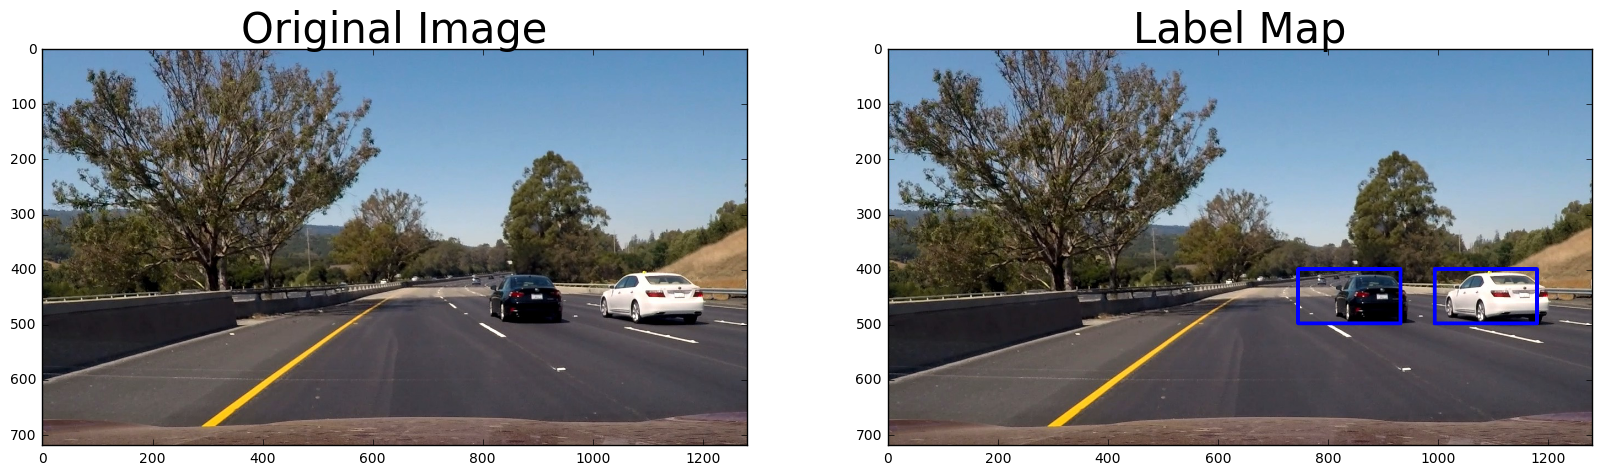

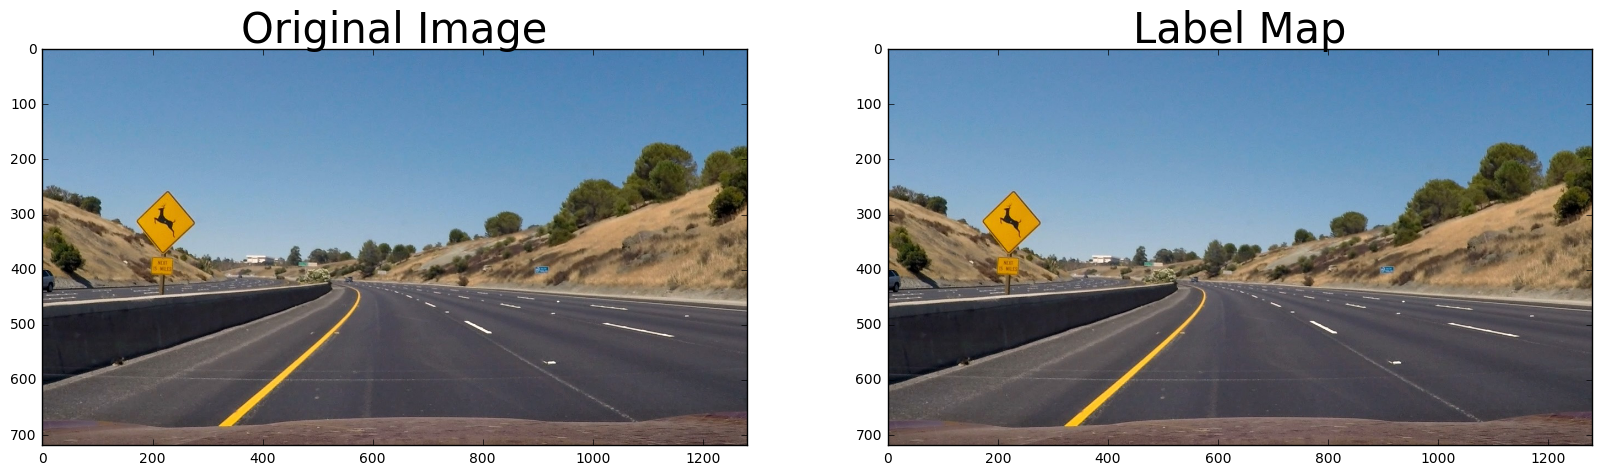

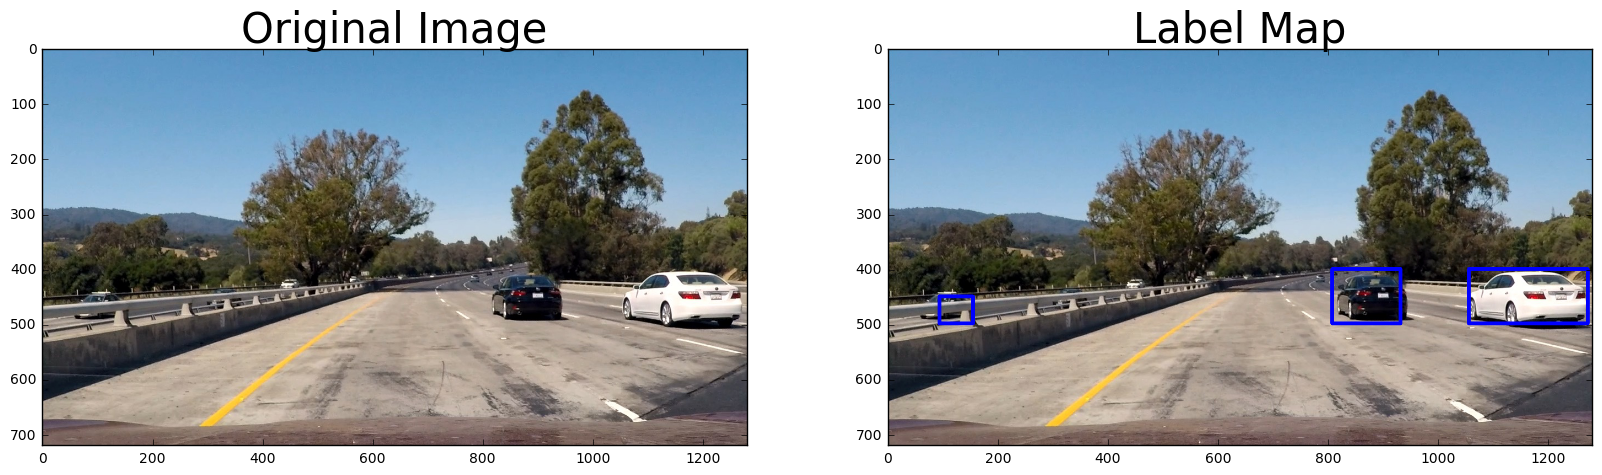

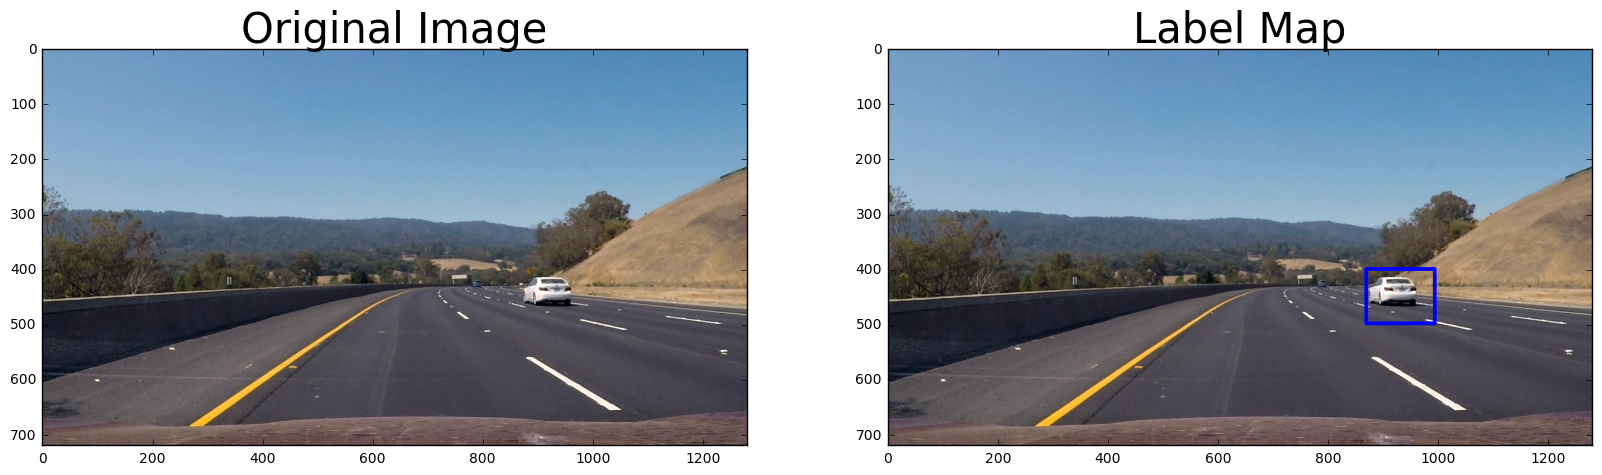

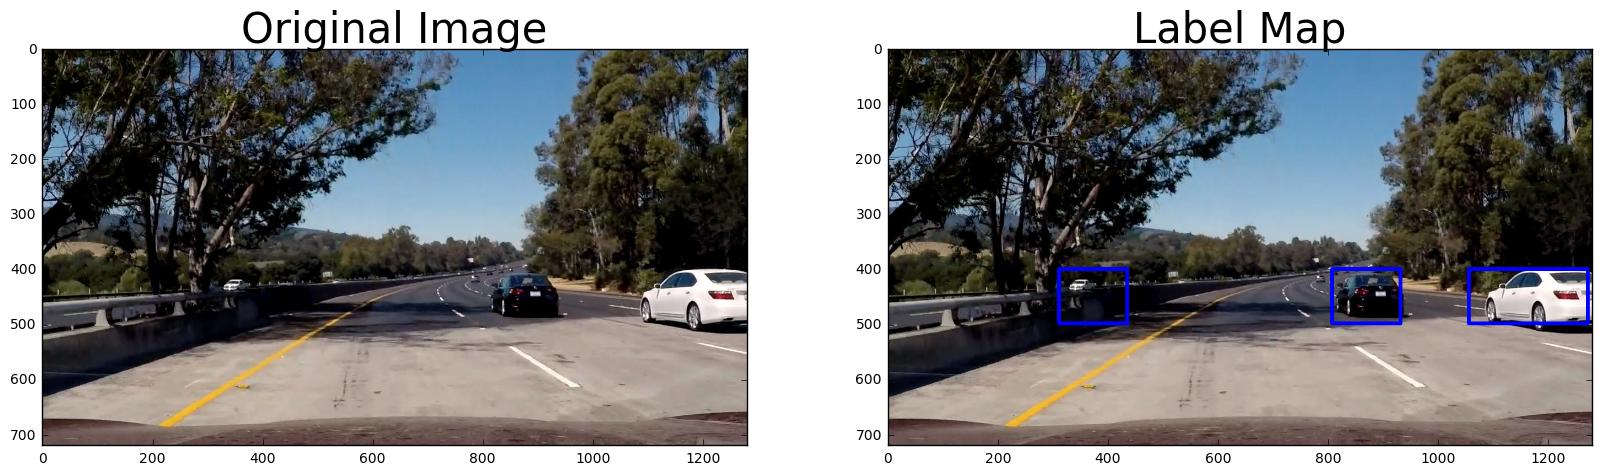

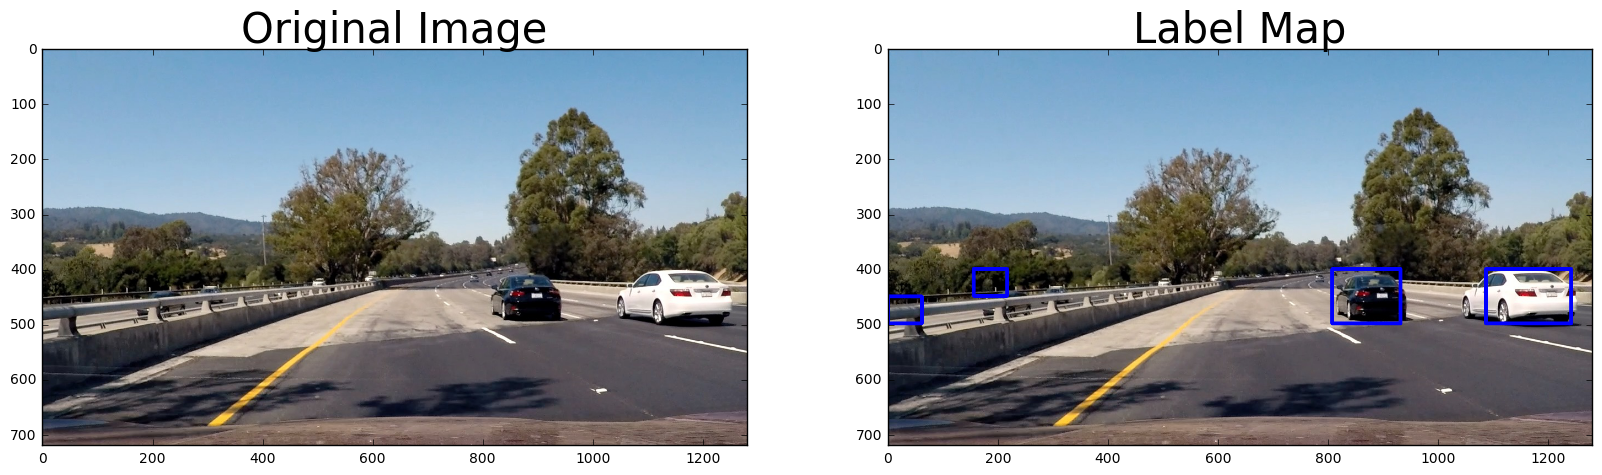

In [6]:

test_images = glob.glob('./media/test_images/test*.jpg')
test_images = ['./media/test_images/test1.jpg','./media/test_images/test2.jpg', 
               './media/test_images/test3.jpg', './media/test_images/test4.jpg']
for idx, fname in enumerate(test_images):
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    single_heatmap = track_vehicle_single_frame.detect_vehicle_by_clf(image, classifier, X_scaler)
    
    result = mark_vehicles(image, single_heatmap, 0)
    
#     for x, y in single_heatmap:
#         image = cv2.rectangle(image, x, y, (0,0,255), 3)
    
    
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=30)
    
    ax2.imshow(result, cmap='Reds')
    ax2.set_title('Label Map', fontsize=30)

In [13]:
def mark_vehicles(image, hot_windows, heat_threshold):
    blank_heat = np.zeros_like(image[:, :, 0]).astype(np.float)
    heatmap = add_heat(blank_heat, hot_windows)


    heatmap = apply_threshold(heatmap, heat_threshold)
    final_map = np.clip(heatmap, 0, 255).astype(np.uint8)

    return final_map

In [ ]:
import glob
from src.utility_funcs import plot_orig_and_processed_img
test_images = glob.glob('./media/test_images/*.jpg')

for idx, fname in enumerate(test_images):
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    single_heatmap = track_vehicle_single_frame.detect_vehicle_by_clf(image, classifier, X_scaler)
    
    result = mark_vehicles(image, single_heatmap, 3)
    
    for x, y in single_heatmap:
        image = cv2.rectangle(image, x, y, (0,0,255), 3)
    
    
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=30)
    
    ax2.imshow(result, cmap='Reds')
    ax2.set_title('With Vehicle Detected mask', fontsize=30)

In [ ]:
single_heatmap = track_vehicle_single_frame.detect_vehicle_by_clf(image, classifier, X_scaler, frame_tracker)

In [ ]:
heat
heatmap = add_heat(heat, hot_windows)


# here is the heapmap need to be added into the collections
heatmap = combined_heatmap.combine_recent_heatmap(heatmap) 


heatmap = apply_threshold(heatmap, 30)
final_map = np.clip(heatmap, 0, 255)

labels = label(final_map)
# print('car found: ', labels[1])
# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image), labels)

return draw_img